# Truney Silver Products Details Analysis
### [Truney Silver Product List](https://www.truney.com/product-category/silver/silver-coins/?products-per-page=all)

Truney是全台最大貴金屬交易中心，也是全台最大白銀買賣網站；藉由文字頻率分析來了解Truney所販售的白銀商品內容

## Data Preparation - Web Crawler

In [1]:
# !pip install lxml

In [2]:
import libs
import requests
import pandas as pd
from bs4 import BeautifulSoup
# define url for crawling
url = 'https://www.truney.com/product-category/silver/?products-per-page=all'

In [3]:
# GET request from url and parse via BeautifulSoup
r = requests.get(url)
r.encoding = 'utf-8' # encoded with format utf-8 for chinese character
web_content = r.text
soup = BeautifulSoup(web_content, 'lxml')

In [4]:
coinlist = soup.find_all('div', class_ = "product-inner clr")

In [5]:
links = [t.find('a',class_="woocommerce-LoopProduct-link")['href'] for t in coinlist]

In [6]:
links[:5]

['https://www.truney.com/product/tag00474/',
 'https://www.truney.com/product/tag00472/',
 'https://www.truney.com/product/tag00470/',
 'https://www.truney.com/product/tag00465/',
 'https://www.truney.com/product/tag00459/']

In [7]:
len(links)

187

## Crawl For All Links

In [45]:
cc=[]
for i in links:
    r = requests.get(i)
    r.encoding = 'utf-8'
    web_content = r.text
    soup = BeautifulSoup(web_content, 'lxml')
    coindescribe = soup.find_all('div', class_ = "woocommerce-Tabs-panel woocommerce-Tabs-panel--description panel entry-content wc-tab")
    details = [t.find_all('p') for t in coindescribe]
    
    paragraphs=[]
    for x in details:
        paragraphs.append(str(x))
        cc.append(paragraphs[0])

In [46]:
f=open('C:/Users/acgan/Desktop/Anaconda/NLP/TF-IDF/silverproductdetails.txt','w',encoding="utf-8")
for i in cc:
    k=''.join([str(j) for j in i])
    k = k.replace('<p>', '')
    k = k.replace('</p>', '')
    f.write(k+"\n")
f.close()

---

# Text Tokenization

# Jieba

In [8]:
import jieba
import jieba.analyse

### 讀入停用詞檔

In [9]:
stopWords=[]
with open('C:/Users/acgan/Desktop/Anaconda/NLP/TF-IDF/stopWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

### 移除停用詞

In [10]:
f=open(r'C:/Users/acgan/Desktop/Anaconda/NLP/TF-IDF/silverdetails.txt',encoding="utf-8")
text = []
for line in f:
    for j in stopWords:
        line = line.replace(j, '')
        line = line.replace('\n', '')
    text.append(line)

In [11]:
text[0]

'PAMP Suisse銀條瑞士質量精度製造成發行飽受國外白銀買家喜愛 正面具PAMP Suisse徽標重量純度包括單獨序列號提高安全性'

### 進行中文斷詞 (套入自定義辭典)

In [12]:
new_data=[]
for w in text:
    jieba.load_userdict("C:/Users/acgan/Desktop/Anaconda/NLP/TF-IDF/silver_dict.txt") #自定義字典
    segments=jieba.cut(w,cut_all=False)
    new_data.append(' '.join(segments))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\acgan\AppData\Local\Temp\jieba.cache
Loading model cost 0.761 seconds.
Prefix dict has been built succesfully.


In [13]:
new_data[0]

'PAMP   Suisse 銀條 瑞士 質量 精度 製 造成 發行 飽 受國外 白銀 買家 喜愛   正 面具 PAMP   Suisse 徽標 重量 純度 包括 單獨 序列 號 提高 安全性'

In [14]:
len(new_data)

184

---

# Text Visualization

### Term Frequency
1. Counter 詞頻分析  
2. jieba.analyse 關鍵詞萃取分析  
3. TF-IDF 詞頻逆文本頻率分析

In [15]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import string
#sys.path.insert(0, '../modules/')

font= r'C:/Users/acgan/Desktop/Anaconda/NLP/TF-IDF/NotoSansCJKtc-Regular.otf'

### 1. Counter 詞頻矩陣

In [16]:
#建立文章詞彙與對應詞頻表
wcount = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in enumerate(text)}
wfrequency = {key: {i:Counter(num)[i] for i in Counter(num)} for key, num in wcount.items()}

In [17]:
#建立詞頻矩陣
dwf_list = [pd.DataFrame(list(num.values()), index=num.keys()) for num in wfrequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = wfrequency.keys()
wfm = wfm[list(set(wfm))]
wfm.head()

,II,迪士尼,然保護,象形文字,發,獨特設,富裕,塑造,分道,叢,...,瑕,豪華,局廠,甘,莫,賦予,娜芙蒂蒂,Truney,招財,放射性
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
counter_text = wfm.to_dict(orient='records')[0] # 詞頻矩陣轉成dictionary

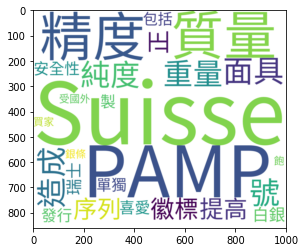

In [19]:
wc1 = WordCloud(background_color="white",width=1000, height=860, margin=2, max_words=80,font_path=font).generate_from_frequencies(counter_text)
plt.imshow(wc1, interpolation="bilinear")

**單以詞頻來看：**  
我們發現最大的詞語為**PAMP** 和 **Suisse**  
Suisse指的是瑞士聯邦，PAMP則是全球知名度非常高的貴金屬製造商，其總部位於瑞士  
我們可以說這兩個詞所指的是同一家鑄造廠  
代表Turney所進貨的白銀商品多來自PAMP廠或是從瑞士的廠商進口  

單從詞頻我們可以發現與**認證性**有關的字眼頻率最高，諸如"徽標"(logo)、精度、質量、序列(認證號)等等；一般而言PAMP也等同於白銀界高品質保證的代名詞

---

### 2. jieba.analyse 關鍵詞分析

* #### 單一品項簡介的關鍵詞

In [20]:
for i,line in enumerate(new_data):
        tags = jieba.analyse.extract_tags(line,10)
        print(i," , ".join(tags))

0 PAMP , Suisse , 銀條 , 質量 , 發行 , 受國外 , 白銀 , 買家 , 喜愛 , 徽標
1 銀幣 , Natura , 恐龍 , 侏羅紀 , 南非 , 正面 , 造幣 , 廠豪 , 硬幣 , 重恐龍
2 貓熊 , 中國 , 危級 , 熊中國 , 危物種 , 全世界 , 瑟夫 , 特物種 , 現存 , 主棲息
3 銀幣 , 模具 , 袁世凱 , 光緒 , 銀元 , 日阪 , 造幣 , 重生 , 北洋 , 受歡
4 英國 , 銀幣 , 鑄造 , 女王 , 皇家 , 伊莉莎白 , 系列 , 十座 , 栩栩 , 鑄幣
5 芭絲特貓 , 仿古 , 女神 , 銀章 , 處理 , 盎司 , 古老 , 特色 , 埃神話 , 造幣敬
6 硬幣 , 笑鴗鳥 , 鑄幣 , 澳利亞 , 銀幣 , 設計 , 發生 , 變化 , 系列 , 代名
7 笑鴗鳥 , 鑄幣 , 澳利亞 , 代名 , 銀幣 , 始年 , 年剛 , 週年 , 運行 , 時間
8 笑鴗鳥 , 鑄幣 , 澳利亞 , 代名 , 銀幣 , 始年 , 年剛 , 週年 , 運行 , 時間
9 銀幣 , 列顛 , 英國 , 造幣 , 美麗 , 皇家 , 純銀英國 , 英鎊 , 生產非 , 成員具
10 銀幣 , 袋鼠 , 純度 , 原廠 , 圍繞 , 澳洲 , 外圈 , 白銀 , 保證 , 鑄幣
11 生肖 , 英國 , 銀幣 , 鼠年 , 出生 , 皇家 , 造幣 , 廠農 , 週期 , 鑄幣
12 生肖 , 盧旺達 , 銀幣 , 系列 , 設計 , 投資 , 四版 , 描繪 , 中國 , 主題
13 發行 , 女王 , 野獸 , 莫蒂默 , 加冕 , 英國 , 愛德華 , 推出 , 格里芬 , 十尊
14 銀幣 , 銀硬幣 , 系列 , 受歡 , 迎動物 , 硬幣 , 球陸動 , 物旦 , 沒知 , 天敵
15 羅賓漢 , 銀幣 , 英雄 , 奧利 , 週年 , 紀念幣 , 維納 , 造幣 , 發行 , 主題
16 銀條 , PAMP , 包裝 , 鼠年 , 生肖 , 主題 , cm , 紅色 , 老鼠 , 精美
17 銀幣 , 鼠年 , 珀斯 , 生肖 , 純度 , 收藏家 , 系列 , 老鼠 , 慶祝 , 鑄幣
18 銀幣 , 鼠年 , 珀斯 , 生肖 , 純度 , 收藏家 , 系列 , 老鼠 , 慶

167 蝙蝠 , 正義聯盟 , 銀鈔 , 系列 , 漫畫 , DC , 超級 , 布魯斯 , 收藏 , 角色
168 銀幣 , 狗年 , 牧羊犬 , 伯斯 , 鑄幣 , 德國 , 生肖 , 中國 , 澳洲 , 牡丹花
169 銀幣 , 狗年 , 牧羊犬 , 伯斯 , 鑄幣 , 德國 , 生肖 , 中國 , 澳洲 , 牡丹花
170 銀幣 , 狗年 , 牧羊犬 , 伯斯 , 鑄幣 , 生肖 , 中國 , 德國 , 澳洲 , 牡丹花
171 珀斯 , 天鵝 , 造幣 , 銀幣 , 殖民 , 澳洲 , 天然 , 雅美 , 鑄幣 , 廠義出
172 銀幣 , 天堂 , 戲劇性 , 羽毛 , 翅膀 , 鑄幣 , 昆士蘭州東 , 鳥美麗 , 作貨幣 , 儀式
173 楓葉 , 銀幣 , 設計 , 發行 , 週年 , 鑄幣 , 紀念幣 , 鑄印 , 標誌 , 防偽
174 銀幣 , 楓葉 , 發行 , 週年 , 鑄幣 , 紀念幣 , 流通性 , 世界 , 年份 , 皇家
175 銀幣 , 非洲 , 河馬 , 設計 , 陸形 , 動物 , 公斤 , 犀牛 , 物主 , 盧旺達
176 銀幣 , 雞年 , 英國 , 鑄幣 , 發行 , 沼澤雛菊 , 生肖 , 盎司 , 正面 , 皇家
177 笨鐘 , 英國 , 伊莉莎白 , 銀幣 , 設計 , 二世 , 特拉法加 , 槌子 , 十五分 , 名標
178 生肖 , 銀幣 , 系列 , 伯斯 , 鑄幣 , 發行 , 獅王 , 加鑄 , 選擇 , 限量
179 銀幣 , 克魯格 , 南非 , 金幣 , 精鑄 , 發行 , 跳羚 , 投資 , 盎司 , 世界
180 銀幣 , 楓葉 , 加鑄 , 鑄幣 , Royal , Canadian , Mint , 簡稱 , RCM , 發行
181 銀幣 , 中國 , 熊貓 , 鑄幣 , 發行 , 古建 , 早發行 , 金幣 , 精鑄 , 版年
182 銀幣 , 楓葉 , 加鑄 , 生肖 , 精鑄 , REVERSE , PROOF , 噴砂 , 底板 , 做工
183 銀幣 , 楓葉 , 加鑄 , 灰熊 , 噴砂 , 底板 , 鑄幣 , 精鑄 , REVERSE , PROOF


* #### 所有品項簡介的關鍵詞
> 取出每個品項簡介的前10個關鍵詞，存檔

In [21]:
jieba_data = new_data
import codecs
wtags = codecs.open("products_tags.txt", "w","utf-8")
for line in jieba_data:
    words = jieba.analyse.extract_tags(line,10)
    wtags.write(" ".join(words))

> 把每個商品簡介的前10項關鍵詞變為萃取資料的input

In [22]:
with open("products_tags.txt", "rb") as f2:
    for line in f2:
        tags = jieba.analyse.extract_tags(line,15)
        print(",".join(tags))
f2.close()

銀幣,鑄幣,發行,珀斯,造幣,中國,生肖,銀條,系列,公克,Scottsdale,伊莉莎白,白銀,硬幣,豬年


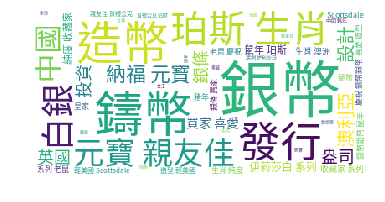

In [23]:
text = open("products_tags.txt", encoding="utf-8").read()
wc2 = WordCloud(font_path=font,
               background_color="white",
               max_words = 50)
wc2.generate(text)
plt.imshow(wc2)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

**關鍵詞分析來看：**  
從各品項的關鍵詞作為文字分析  
我們會發現**銀幣**、**鑄幣**、**造幣**、**發行**、**珀斯**等字眼  
這代表在所有商品描述中，大部分的身品屬於銀幣，而非銀磚條、銀塊等等  
其中每一篇描述幾乎都會提及商品的相關資訊，例如形狀、材質、主題、發行時間、重量等等  
**珀斯**：珀斯鑄幣廠是澳洲最古老最負盛名的鑄幣廠，也是世界非常知名的高品質鑄幣廠  
___
關鍵詞分析下我們發現**商品本身的規格**最有關係

---

## TF-IDF

In [24]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  

In [25]:
vectorizer = CountVectorizer() #將詞語轉為詞頻矩陣
transformer = TfidfTransformer() #統計詞語的tf-idf權值

> 將文字內的詞語轉為詞頻矩陣  
> 計算出tf-idf權值  
> 將模型內有詞語另存為list

In [26]:
tfidf = transformer.fit_transform(vectorizer.fit_transform(new_data))  
word=vectorizer.get_feature_names()
print('列舉五個詞語：',word[:5])

列舉五個詞語： ['aaham', 'acer', 'advanced', 'aes', 'always']


> 提取tf-idf權重值，存到dictionary  

In [27]:
weight=tfidf.toarray() #提取tf-idf權重
tfidf_list = {}
for i in range(len(weight)):#所有品項 
    for j in range(len(word)): #某一品項內的詞語權重 
        tfidf_list[word[j]] = weight[i][j]
#tfidf_list

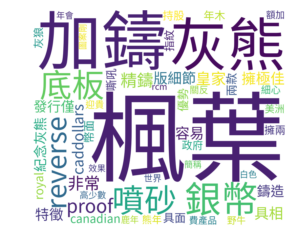

In [28]:
wc3 = WordCloud(font_path=font,  # 設定字型
background_color="white",  # 背景顏色
max_words=50,  # 詞雲顯示的最大詞數
#stopwords=stopwords,
random_state=42,
width=1000, height=860, margin=2,
)
wc3.generate_from_frequencies(tfidf_list)
plt.imshow(wc3,interpolation="bilinear")
plt.axis("off")
plt.figure()

**逆文本頻率分析**  
我們會發現**楓葉**、**加鑄**、**灰熊**等字眼十分龐大  

* **楓葉**：楓葉銀幣是非常特別的銀幣，由加拿大皇家鑄幣廠(RCM）製造，由加拿大政府100%持股  
加拿大楓葉金銀幣是世界上最受歡迎之一的貴金屬產品，擁有極佳的防偽特徵  
同時他也是眾多銀幣中最經濟實惠、單位價格最便宜、銀含量為9999(大多為999)的銀幣    
是許多人作為保值與投資第一選擇  
* **加鑄**：大多為楓葉銀幣，因熱銷有的會做加鑄版，及原有的楓葉版本再上一些圖案  
* **灰熊**：楓葉加鑄版的其中一個版本為灰熊，雖然動物系列是銀幣常有的主題，但灰熊是偏少的  
___
從TF-IDF我們可以發現**最具代表性**的商品，即Truney的楓葉加鑄系列

---

# Word Embedding

In [35]:
from gensim.models import Word2Vec

In [36]:
new=[]
for i in range(len(new_data)):
    sent = new_data[i].split(' ')
    while '' in sent:
        sent.remove('') #移除空元素
    new.append(sent)

In [37]:
# build a Word2Vce model
model = Word2Vec(new, size=5 #embedding的數量
                 , window=5 #Ngram
                 , min_count=1 #字出現的次數
                 , workers=4 #CPU平行
                 , iter=50) #一筆資料訓練的次數
print('Word2Vec model=> ', model)

Word2Vec model=>  Word2Vec(vocab=4853, size=5, alpha=0.025)


In [50]:
print("model.wv['楓葉']", ' => ', model.wv['楓葉'])

model.wv['楓葉']  =>  [-2.3762453  -0.44670635  8.182491   -0.15951596  2.6915712 ]


In [49]:
# most similar words
print('most similar to PAMP =>')
print(model.wv.most_similar('PAMP', topn=5))
print()
print('most similar to 楓葉 =>')
print(model.wv.most_similar('楓葉', topn=5))
print()
print('most similar to 加鑄 =>')
print(model.wv.most_similar('加鑄', topn=5))
print()
print('most similar to 灰熊 =>')
print(model.wv.most_similar('灰熊', topn=5))

most similar to PAMP =>
[('氣重', 0.9889729022979736), ('高現', 0.9834253191947937), ('合作', 0.980421781539917), ('金', 0.9800736904144287), ('成', 0.9787018895149231)]

most similar to 楓葉 =>
[('五年', 0.9941502809524536), ('加', 0.9904643297195435), ('盎司', 0.9840817451477051), ('喻戶曉', 0.9812787771224976), ('名家', 0.9802663922309875)]

most similar to 加鑄 =>
[('屬性', 0.9838917851448059), ('鑄幣廠', 0.9825742840766907), ('早發行', 0.979753851890564), ('版', 0.9793522953987122), ('廠皆通', 0.9695048332214355)]

most similar to 灰熊 =>
[('廠會', 0.9925720691680908), ('流通', 0.992015540599823), ('造幣廠', 0.985101580619812), ('官方', 0.9839140176773071), ('家', 0.9829721450805664)]
